In [1]:
import pandas

users_file = "yelp_dataset/yelp_academic_dataset_user.json"
review_file = "yelp_dataset/yelp_academic_dataset_review.json"
business_file = "yelp_dataset/yelp_academic_dataset_business.json"

from pyspark.sql import SparkSession
import pickle
from pyspark.sql.types import Row
from nltk.corpus import wordnet as wn
from textblob import TextBlob

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

#df = spark.read.json(business_file)


In [1]:
import pickle
user_to_food = pickle.load(open("util_data/user_food_profile.pkl","rb"))
users = set(user_to_food.keys())

business_to_food_map = pickle.load(open("util_data/business_to_food_mapping.pkl","rb"))
business = set(business_to_food_map.keys())

business_id_to_name = pickle.load(open("util_data/business_id_to_name.pkl","rb"))
user_id_to_name = pickle.load(open("util_data/user_id_to_name.pkl","rb"))


In [4]:
count = 0

for bus in business_id_to_name:
    if bus in business:
        count += 1

count
len(business)

In [ ]:

business_id_to_name = dict([(id,name) for id, name in 
                            business_id_to_name.items() if id in business])
stamp = 0
h_set = set()

for id, name in business_id_to_name.items():
    if name in h_set:
        # repead
        business_id_to_name[id] = name + str(stamp)
        stamp += 1
    else:
        h_set.add(name)

business_name_to_id = dict([(name,id) for id,name in business_id_to_name.items()])


user_id_to_name = dict([(id,name) for id, name in 
                            user_id_to_name.items() if id in users])

stamp = 0
h_set = set()

for id, name in user_id_to_name.items():
    if name in h_set:
        # repead
        user_id_to_name[id] = name + str(stamp)
        stamp += 1
    else:
        h_set.add(name)

user_name_to_id = dict([(name,id) for id,name in user_id_to_name.items()])


In [16]:
import pickle

pickle.dump(business_id_to_name,open("business_id_to_name.pkl","wb"))
pickle.dump(business_name_to_id,open("business_name_to_id.pkl","wb"))
pickle.dump(user_id_to_name,open("user_id_to_name.pkl","wb"))
pickle.dump(user_name_to_id,open("user_name_to_id.pkl","wb"))



In [12]:
x=  business_id_to_name.values()

repeat = set()
h = set()
for t in x:
    if t in h:
        repeat.add(t)
    else:
        h.add(t)

repeat


In [ ]:
df = spark.read.json(business_file)
df.show(5)


In [3]:

len(df.collect())

In [4]:
x = df.rdd.map(lambda row:(row['business_id'], row['name'], row['city'])).map(lambda row: (row[0], row[1])).\
    collect()


In [ ]:
business_id_to_name = dict(x)
import pickle
pickle.dump(business_id_to_name, open("util_data/business_id_to_name.pkl","wb"))


In [6]:

len(business_id_to_name)

In [7]:
business_name_to_id = dict([(id,name) for name,id in business_id_to_name.items()])
import pickle
pickle.dump(business_name_to_id, open("util_data/business_name_to_id.pkl","wb"))


In [ ]:
x = df.select("user_id","name").rdd.map(lambda row: (row['user_id'],row['name'])).collect()
x


+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|     city|               hours|is_open|     latitude|     longitude|                name|        neighborhood|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|  1314 44 Avenue NE|[,,,,,,, False,, ...|Apn5Q_b6Nz61Tq4Xz...|Tours, Breweries,...|  Calgary|[11:0-21:0, 8:30-...|      1|51.0918130155|-114.031674872|Minhas Micro Brewery|                    |    T2E 6L6|          24|  4.0|   AB|
|                   |[,, none,,,,, Fal...|AjEbIBw6ZFfln7ePH...|Chicken W

In [ ]:
user_id_to_name = dict(x)
user_id_to_name
import pickle
pickle.dump(user_id_to_name, open("util_data/user_id_to_name.pkl","wb"))


+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|     city|               hours|is_open|     latitude|     longitude|                name|        neighborhood|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|  1314 44 Avenue NE|[,,,,,,, False,, ...|Apn5Q_b6Nz61Tq4Xz...|Tours, Breweries,...|  Calgary|[11:0-21:0, 8:30-...|      1|51.0918130155|-114.031674872|Minhas Micro Brewery|                    |    T2E 6L6|          24|  4.0|   AB|
|                   |[,, none,,,,, Fal...|AjEbIBw6ZFfln7ePH...|Chicken W

In [25]:
user_name_to_id = dict([(name,id) for id,name in user_id_to_name.items()])
import pickle
pickle.dump(user_id_to_name, open("util_data/user_name_to_id.pkl","wb"))

+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|     city|               hours|is_open|     latitude|     longitude|                name|        neighborhood|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+---------+--------------------+-------+-------------+--------------+--------------------+--------------------+-----------+------------+-----+-----+
|  1314 44 Avenue NE|[,,,,,,, False,, ...|Apn5Q_b6Nz61Tq4Xz...|Tours, Breweries,...|  Calgary|[11:0-21:0, 8:30-...|      1|51.0918130155|-114.031674872|Minhas Micro Brewery|                    |    T2E 6L6|          24|  4.0|   AB|
|                   |[,, none,,,,, Fal...|AjEbIBw6ZFfln7ePH...|Chicken W

In [ ]:

def make_category_set(strs):
    if strs == None:
        return set([])
    else:
        strs = strs.split(",")
        return set(strs)
    
business_to_category = df[df['city']=="Las Vegas"].rdd\
    .map(lambda row: (row['business_id'],make_category_set(row['categories'])))
business_to_category = business_to_category.collect()

In [3]:

business_to_category = dict(business_to_category)
business_to_category

pickle.dump(business_to_category, open("business_to_category.pkl","wb"))


NameError: name 'business_to_category' is not defined

In [3]:
business_table = pandas.read_json(business_file, orient='columns', lines=True)
las_vegas_hotels = business_table.loc[business_table['city']=='Las Vegas',['business_id','review_count','stars','name','categories']]
las_vegas_hotels.shape

(28865, 5)

In [5]:

las_vegas_hotels.head(5)

24469 28865


In [34]:
choosen_category = open("manually_choosen_categories.txt","r")
choosen_category = list(choosen_category)
choosen_category = [cat.strip().split("=")[0] for cat in choosen_category]
choosen_category = [cat.lower() for cat in choosen_category]
choosen_category = set(choosen_category)
print("italian" in choosen_category)

24469 28865


In [26]:

categories = las_vegas_hotels['categories']
categories = list(categories)
#for cat in categories:
#    print(cat.strip().split(","))
#    break
categories = [cat.strip() for cat in categories]

24469 28865


In [38]:
import pickle

la_business = {}
business_to_cat = {}

business_id = las_vegas_hotels['business_id']
stars = las_vegas_hotels['stars']
review_count = las_vegas_hotels['review_count']
categories = las_vegas_hotels['categories']

if len(business_id) != len(stars):
    assert Exception("wierd!!")

business_id = list(business_id)
stars = list(stars)
average_stars = sum(stars) / float(len(stars))
review_count = list(review_count)
categories = list(categories)
average_review_count = sum(review_count)/ float(len(review_count))
generic_count = 0
total_business_count = 0

for index in range(len(business_id)):
    total_business_count += 1
    if business_id[index] in la_business:
        assert Exception("wow!!")
    else:
        la_business[business_id[index]] = {"stars":float(stars[index]), "review_count":
                                           float(review_count[index])}
    if categories[index]:
        business_to_cat[business_id[index]] = set([cat.lower() 
            for cat in categories[index].strip().split(",") if cat.lower() in choosen_category])
        if len(business_to_cat[business_id[index]]) == 0:
            generic_count += 1
            business_to_cat[business_id[index]] = set(["generic"])
    else:
        generic_count += 1
        business_to_cat[business_id[index]] = set(["generic"])
        
la_business = {
    "average_review_count": average_review_count,
    "average_stars": average_stars,
    "business_details":la_business,
    "business_to_category_mapping": business_to_cat
}


pickle.dump(la_business, open("util_data/las_vegas_business_ids.pkl","wb"))
print(generic_count, total_business_count)


24469 28865


In [5]:
las_vegas_hotels = business_table.loc[business_table['city']=='Las Vegas',['business_id','name','categories']]
las_vegas_hotels = las_vegas_hotels.loc[las_vegas_hotels['categories'].str.contains('Restaurant|Food|Bar|Pub')==True,['name','categories']]
categories = las_vegas_hotels['categories']

categories_set = {}

for each_category in categories:
    for type_val in each_category.split(","):
        if type_val != 'Restaurants' and type_val != 'Food':
            type_val = type_val.strip().lower()
            if type_val in categories_set:
                categories_set[type_val] += 1
            else:
                categories_set[type_val] = 1

len(categories_set)
categories_set = dict([(k,v) for k,v in categories_set.items() if v > 2])
len(categories_set)
categories_set

with open("cusine_categories.txt","w+") as output_file:
    for k,v in categories_set.items():
        output_file.write(str(k) + "," + str(v) + "\n")


    
    


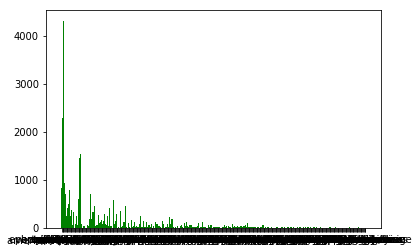

In [6]:
import numpy as np
import matplotlib.pyplot as plt

pos = np.arange(len(list(categories_set.keys())))
width = 1.0     

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(categories_set.keys())

plt.bar(list(categories_set.keys()), list(categories_set.values()), width, color='g')
#                           
plt.show()

In [10]:
temp = [(a,b) for a,b in categories_set.items() if b >= 50]
temp = sorted(temp, key=lambda x:x[1], reverse=True)
print(temp[:25])
print(len(temp))

[('restaurants', 4310), ('food', 2287), ('nightlife', 1529), ('bars', 1452), ('fast food', 940), ('american (traditional)', 829), ('mexican', 788), ('coffee & tea', 712), ('sandwiches', 695), ('pizza', 655), ('american (new)', 603), ('burgers', 585), ('breakfast & brunch', 495), ('chinese', 453), ('specialty food', 444), ('desserts', 432), ('shopping', 419), ('italian', 411), ('japanese', 361), ('seafood', 360), ('beauty & spas', 341), ('event planning & services', 339), ('convenience stores', 338), ('grocery', 338), ('bakeries', 331)]
105
